# P2. CIFAR10 image classification

Design and implement a convolutional neural network for the CIFAR10 image classification task aiming to achieve a high test accuracy.
Evaluate the classification accuracy by reporting top-1 and top-5 test error rates.

# Model1 VGG

VGG increasing network depth using many small (3x3) convolution fliters, this is efficient because it use fewer parameters than larger fliters.

Our VGG model has three VGG blocks. Each of them consists two or three convolutional layers, one maxpooling layer and dropout layer(if needed).
And then connects to flatten layers and FC layers, using softmax as output activation function. The depth is suitable for this dataset. We also add dropout layers to reduce overfitting.

Optimizer choice is 'Adam' since it has the best performance in the experiments above. We set a lower learning rate 0.0005 to better fine tune the weights.

Batch size is 256 means we update weights after training 256 samples, and we use all the batches training 20 epoches.

In [2]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from random import shuffle

# deep learning framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# ML modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# data preprocessing
from tensorflow.keras.utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.datasets import cifar10 # a 10-class dataset used for figure classification
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
data_train, data_test = data_train / 255.0, data_test / 255.0
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=0.2, random_state=2025)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
model1 = tf.keras.Sequential()

# Block 1
model1.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
#model1.add(tf.keras.layers.Dropout(0.1))

# Block 2
model1.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
#model1.add(tf.keras.layers.Dropout(0.1))

# Block 3
model1.add(tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model1.add(tf.keras.layers.Dropout(0.1))

# Flatten and Fully Connected layers
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))

# Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)]
)
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [ ]:
# run the model
# train_generator = datagen.flow(data_train, label_train, batch_size=256)
# history1 = model1.fit(train_generator, epochs=60, validation_data=(data_val, label_val))
history1 = model1.fit(data_train, label_train, epochs=20, batch_size=256, validation_split=0.2)

Epoch 1/20
125/125 [==============================] - 224s 2s/step - loss: 1.9635 - accuracy: 0.2678 - sparse_top_k_categorical_accuracy: 0.7823 - val_loss: 1.6451 - val_accuracy: 0.3790 - val_sparse_top_k_categorical_accuracy: 0.8903
Epoch 2/20
125/125 [==============================] - 214s 2s/step - loss: 1.5164 - accuracy: 0.4375 - sparse_top_k_categorical_accuracy: 0.9130 - val_loss: 1.3099 - val_accuracy: 0.5256 - val_sparse_top_k_categorical_accuracy: 0.9386
Epoch 3/20
125/125 [==============================] - 214s 2s/step - loss: 1.2716 - accuracy: 0.5385 - sparse_top_k_categorical_accuracy: 0.9453 - val_loss: 1.2016 - val_accuracy: 0.5645 - val_sparse_top_k_categorical_accuracy: 0.9538
Epoch 4/20
125/125 [==============================] - 214s 2s/step - loss: 1.0776 - accuracy: 0.6131 - sparse_top_k_categorical_accuracy: 0.9620 - val_loss: 0.9984 - val_accuracy: 0.6420 - val_sparse_top_k_categorical_accuracy: 0.9675
Epoch 5/20
125/125 [==============================] - 213s 2

Text(0.5, 0.98, 'VGG')

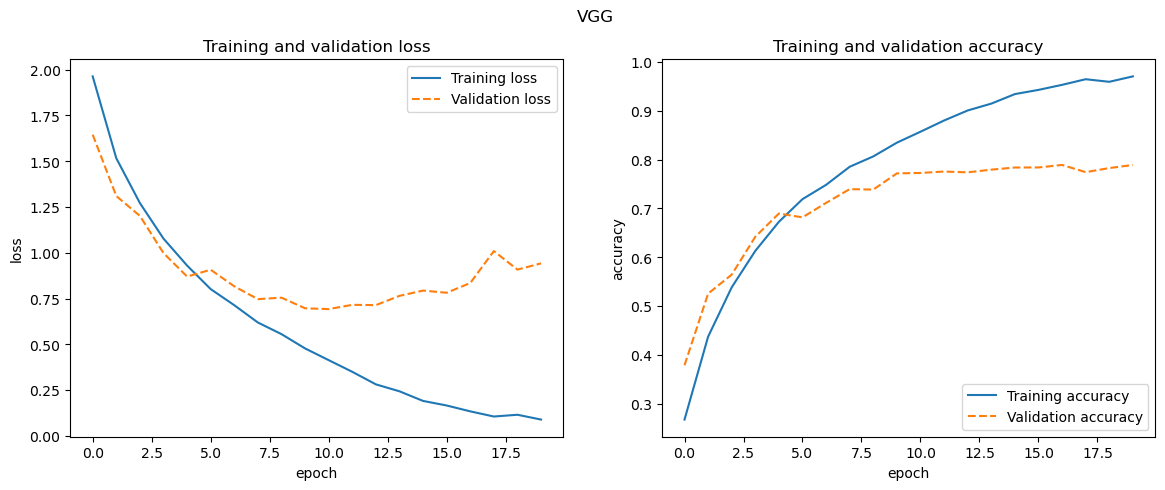

In [ ]:
# plot training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5),dpi=100)
ax1.plot(history1.history['loss'],'-', label='Training loss')
ax1.plot(history1.history['val_loss'],'--', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')
ax2.plot(history1.history['accuracy'],'-', label='Training accuracy')
ax2.plot(history1.history['val_accuracy'],'--', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('VGG')

In [ ]:
# evaluate test accuracy
score = model1.evaluate(data_test, label_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy (top 1):', score[1])
print('\n', 'Test accuracy (top 5):', score[2])


 Test accuracy (top 1): 0.786300003528595

 Test accuracy (top 5): 0.9850000143051147


In [ ]:
Compared to the results in P1，VGG achieved lower loss in only 20 epoches，78.6% test accuracy and 98.5% top5 test accuracy.
Indicating this model is better.

# Model 2 ResNet18

ResNet18 is a deep residual network with 18 layers. It features residual connections (skip connections) to address vanishing gradients, making deep networks easier to train. ResNet50,101 is too deep and not very suitable for this dataset with small images 32x32.

We use the pretained model and modified top layer for 10 classifications.

Optimizer choice is 'SGD' with decay lr which help fine-tune the weights more precisely. Batch size is 128 means we update weights after training 128 samples, and we use all the batches training 40 epoches.


In [16]:
# ResNet18 is not in Keras, so we need to use pytorch.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
# Data Loading and Augmentation for CIFAR-10
# CIFAR-10 images are 32x32; we apply standard normalization and augmentation.
# Define data transformations for training with augmentation and testing
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])
# Load CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Data loaders: batch_size=128, shuffling for training
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader  = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
def compute_topk_correct(outputs, targets, k=5):
    # Get the top k predictions for each sample
    _, pred_topk = outputs.topk(k, dim=1, largest=True, sorted=True)
    # Check if targets are in the top k predictions
    correct_topk = pred_topk.eq(targets.view(-1, 1).expand_as(pred_topk))
    # For each sample, check if any of the top-k predictions is correct
    topk_correct = (correct_topk.sum(dim=1) > 0).sum().item()
    return topk_correct

def evaluate(model, dataloader, criterion): # return loss, top1_acc, top5_acc
    model.eval()
    total_loss = 0.0
    total_samples = 0
    top1_correct = 0
    top5_correct = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            batch_size = inputs.size(0)
            total_loss += loss.item() * batch_size
            total_samples += batch_size

            # top-1
            _, predicted = outputs.max(1)  # (batch_size,)
            top1_correct += predicted.eq(labels).sum().item()

            # top-5
            top5_correct += compute_topk_correct(outputs, labels, k=5)
    avg_loss = total_loss / total_samples
    top1_acc = top1_correct / total_samples
    top5_acc = top5_correct / total_samples
    return avg_loss, top1_acc, top5_acc


In [30]:
# Load Pretrained ResNet18 and Modify the Model
# Load a pretrained ResNet18 model from torchvision
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Modify the final fully connected layer to output 10 classes instead of 1000 (for CIFAR-10)
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Loss Function, Optimizer, and Learning Rate Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [31]:
num_epochs = 40
# save training data
train_loss_list = []
train_top1_list = []
train_top5_list = []

val_loss_list = []
val_top1_list = []
val_top5_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    top1_correct = 0
    top5_correct = 0
    total_samples = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        batch_size = inputs.size(0)
        running_loss += loss.item() * batch_size
        total_samples += batch_size

        # top-1
        _, predicted = outputs.max(1)
        top1_correct += predicted.eq(labels).sum().item()

        # top-5
        top5_correct += compute_topk_correct(outputs, labels, k=5)

    train_loss = running_loss / total_samples
    train_top1 = top1_correct / total_samples
    train_top5 = top5_correct / total_samples
    val_loss, val_top1, val_top5 = evaluate(model, testloader, criterion)

    scheduler.step()

    # save to list
    train_loss_list.append(train_loss)
    train_top1_list.append(train_top1)
    train_top5_list.append(train_top5)

    val_loss_list.append(val_loss)
    val_top1_list.append(val_top1)
    val_top5_list.append(val_top5)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Top1: {train_top1:.4f}, Train Top5: {train_top5:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Top1: {val_top1:.4f}, Val Top5: {val_top5:.4f}")

Epoch [1/40] Train Loss: 1.0426, Train Top1: 0.6407, Train Top5: 0.9563 | Val Loss: 0.7603, Val Top1: 0.7318, Val Top5: 0.9846
Epoch [2/40] Train Loss: 0.7137, Train Top1: 0.7583, Train Top5: 0.9841 | Val Loss: 0.6517, Val Top1: 0.7808, Val Top5: 0.9874
Epoch [3/40] Train Loss: 0.6207, Train Top1: 0.7871, Train Top5: 0.9886 | Val Loss: 0.5917, Val Top1: 0.7942, Val Top5: 0.9905
Epoch [4/40] Train Loss: 0.5602, Train Top1: 0.8083, Train Top5: 0.9903 | Val Loss: 0.5733, Val Top1: 0.8069, Val Top5: 0.9891
Epoch [5/40] Train Loss: 0.5228, Train Top1: 0.8186, Train Top5: 0.9915 | Val Loss: 0.5641, Val Top1: 0.8103, Val Top5: 0.9905
Epoch [6/40] Train Loss: 0.4953, Train Top1: 0.8276, Train Top5: 0.9931 | Val Loss: 0.5265, Val Top1: 0.8229, Val Top5: 0.9904
Epoch [7/40] Train Loss: 0.4708, Train Top1: 0.8369, Train Top5: 0.9936 | Val Loss: 0.5185, Val Top1: 0.8294, Val Top5: 0.9918
Epoch [8/40] Train Loss: 0.4463, Train Top1: 0.8451, Train Top5: 0.9939 | Val Loss: 0.5346, Val Top1: 0.8191, V

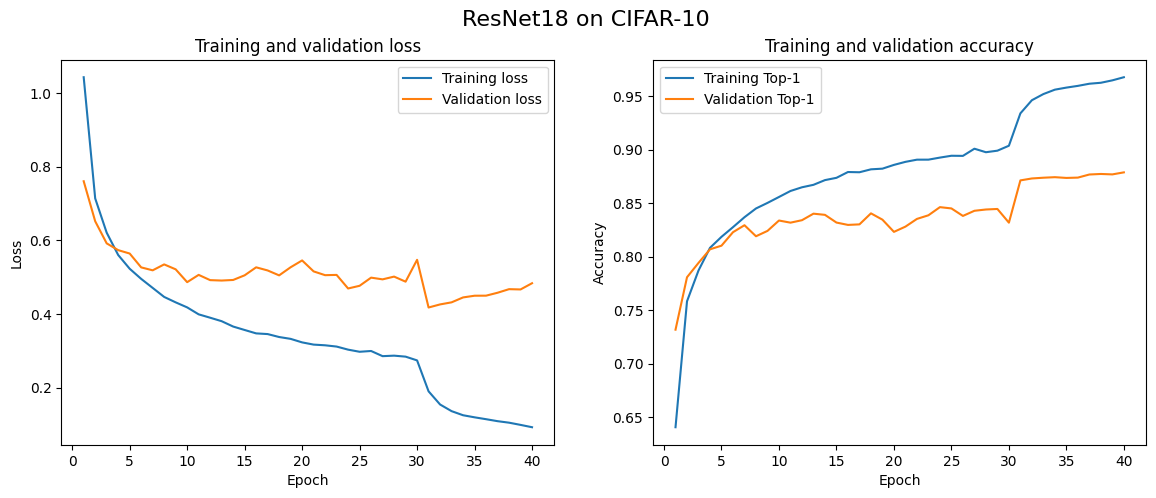


Final Test - Loss: 0.4835, Top-1 Acc: 0.8788, Top-5 Acc: 0.9942


In [32]:
# plot loss and accuracy (two subplots)
epochs_range = range(1, num_epochs + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)
fig.suptitle("ResNet18 on CIFAR-10", fontsize=16)

# Loss
ax1.plot(epochs_range, train_loss_list, label='Training loss')
ax1.plot(epochs_range, val_loss_list,   label='Validation loss')
ax1.set_title("Training and validation loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

# Top-1 Accuracy
ax2.plot(epochs_range, train_top1_list, label='Training Top-1')
ax2.plot(epochs_range, val_top1_list,   label='Validation Top-1')
ax2.set_title("Training and validation accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.show()

final_loss, final_top1, final_top5 = evaluate(model, testloader, criterion)
print(f"\nFinal Test - Loss: {final_loss:.4f}, Top-1 Acc: {final_top1:.4f}, Top-5 Acc: {final_top5:.4f}")

From the loss and accuracy graph, we can see that ResNet18 has good performance with lower loss and high accuracy 87.88%. And the model doesn't show obvious trend of overfitting, meaning good generalization.